In [1]:
from keras.models import load_model
import numpy as np
import tensorflow as tf
from scipy import spatial
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
model = load_model("Sauvegarde modèle/model_sauvegarde")
representation = load_model("Sauvegarde modèle/simi_sauvegarde")

C:\Users\theoo\Anaconda3\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
img = np.load("Sauvegarde modèle/img.npy")
label = np.load("Sauvegarde modèle/label.npy")
Class = np.load("Sauvegarde modèle/class.npy")
simi = np.load("Sauvegarde modèle/representation.npy")

In [13]:
pred_test = np.expand_dims(img[225], axis=0)
print(np.shape(pred_test ))
pred = model.predict(pred_test)
pred = pred.argmax(axis=1)[0]

(1, 224, 224, 3)


In [14]:
pred

0

In [15]:
def similarite(nb,quer):
    distance,index = spatial.KDTree(simi).query(quer,k=nb+1)  
    plt.imshow(np.squeeze(img[index[0]]))
    distance = distance[1:]
    index = index[1:]
    #plt.show()
    plt.figure(figsize=(10,10))
    for n in range(len(index)):
          ax = plt.subplot(5,5,n+1)
          plt.imshow(np.squeeze(img[index[n]]))
          plt.title(Class[label[index[n]]==1][0].title())
          plt.axis('off')
    plt.show()

(1024,)


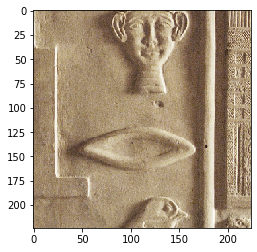

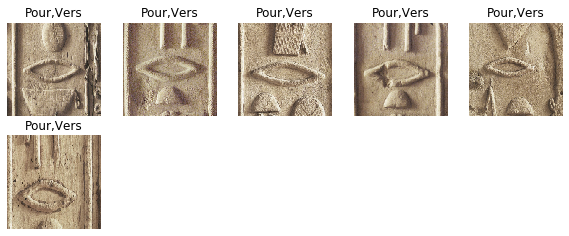

In [19]:
image = np.expand_dims(img[227], axis=0) # selection de l'image auquelle il faut trouver les images similaire
quer = representation.predict(image)[0]
print(np.shape(quer))

nb = 6
similarite(nb,quer)